In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
import torch as tr
from torch import nn
import torch.nn.functional as F
import torchvision as tv
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
from impl.arch import *
from impl.rendering import *
from impl.data_source import *
from impl.misc import random_pose

In [4]:
model = VeryTinyNerfModel(config=ModelConfig(
    hidden_size=128,
    embed_num_pos=6,
    embed_num_dir=6,
))

In [5]:
def predict(pose: torch.Tensor):
    return nf_render_pose(
        model,
        height,
        width,
        focal_length,
        pose=pose,
        thresh_near=2,
        thresh_far=6,
        num_samples_per_ray=32,
        chunk_size=8096,
    )

In [23]:
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)

In [43]:
# Train
for i in range(1000):
    # idx = torch.randint(images.shape[0], (1,)).item()
    idx = i % images.shape[0]
    target_pose = poses[idx]
    # (H, W, 3)
    target_image = images[idx]
    
    # (H, W, 3)
    image_predicted = predict(target_pose)

    loss = F.mse_loss(image_predicted, target_image)

    if i % 100 == 0:
        print(f"{i}: {loss.item()}") 
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Done")

0: 0.0005390935693867505
100: 0.0012329461751505733
200: 0.0005256360745988786
300: 0.0028413021937012672
400: 0.0007288064807653427
500: 0.0004321889718994498
600: 0.0004186077567283064
700: 0.0003296404320280999
800: 0.00120022043120116
900: 0.0011689529055729508
Done


theta=-49.908721923828125, phi=319.0667724609375


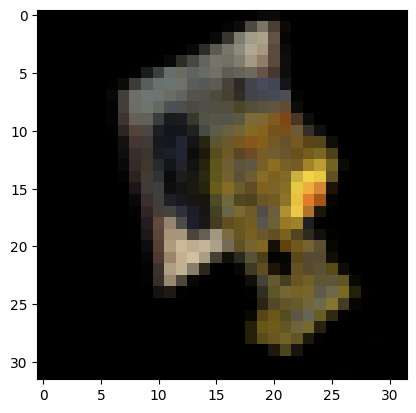

In [59]:
# plt.imshow(predict(poses[43]).detach())
plt.imshow(predict(random_pose()).detach())

In [60]:
torch.save({'model_state': model.state_dict()},'checkpoints/001.chk')

In [ ]:
# checkpoint = torch.load('checkpoints/001.chk')
# model.load_state_dict(checkpoint['model_state'])